In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
base_folder = "/content/drive/MyDrive/Colab Notebooks/customer_churn"
%cd "{base_folder}"

/content/drive/MyDrive/Colab Notebooks/customer_churn


In [3]:
import sqlite3
import pandas as pd
conn = sqlite3.connect(f"{base_folder}/data/customer_churn.db")
customer = pd.read_sql_query(
    """
    SELECT
        c.customerId,
        c.surname,
        c.CreditScore,
        c.age,
        c.tenure,
        c.balance,
        c.numofproducts,
        c.hascrcard,
        c.IsActiveMember,
        g.gender,
        geo.geography,
        c.estimatedSalary,
        c.exited
    FROM customer_fact AS c
    JOIN gender AS g
        ON g.gender_id = c.gender_id
    JOIN geography AS geo
        ON geo.geography_id = c.geography_id
    ORDER BY c.customerId
    """,
    conn,
)
conn.close()

customer.head()

,customerId,surname,creditScore,age,tenure,balance,numofProducts,hasCrCard,isActiveMember,gender,geography,estimatedSalary,exited
0,15565701,Ferri,698,39,9,161993.89,1,0,0,Female,Spain,90212.38,0
1,15565706,Akobundu,612,35,1,0.00,1,1,1,Male,Spain,83256.26,1
2,15565714,Cattaneo,601,47,1,64430.06,2,0,1,Male,France,96517.97,0
3,15565779,Kent,627,30,6,57809.32,1,1,0,Female,Germany,188258.49,0
4,15565796,Docherty,745,48,10,96048.55,1,1,0,Male,Germany,74510.65,0


In [4]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerId       10000 non-null  int64  
 1   surname          10000 non-null  object 
 2   creditScore      10000 non-null  int64  
 3   age              10000 non-null  int64  
 4   tenure           10000 non-null  int64  
 5   balance          10000 non-null  float64
 6   numofProducts    10000 non-null  int64  
 7   hasCrCard        10000 non-null  int64  
 8   isActiveMember   10000 non-null  int64  
 9   gender           10000 non-null  object 
 10  geography        10000 non-null  object 
 11  estimatedSalary  10000 non-null  float64
 12  exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
customer.describe()

,customerId,creditScore,age,tenure,balance,numofProducts,hasCrCard,isActiveMember,estimatedSalary,exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


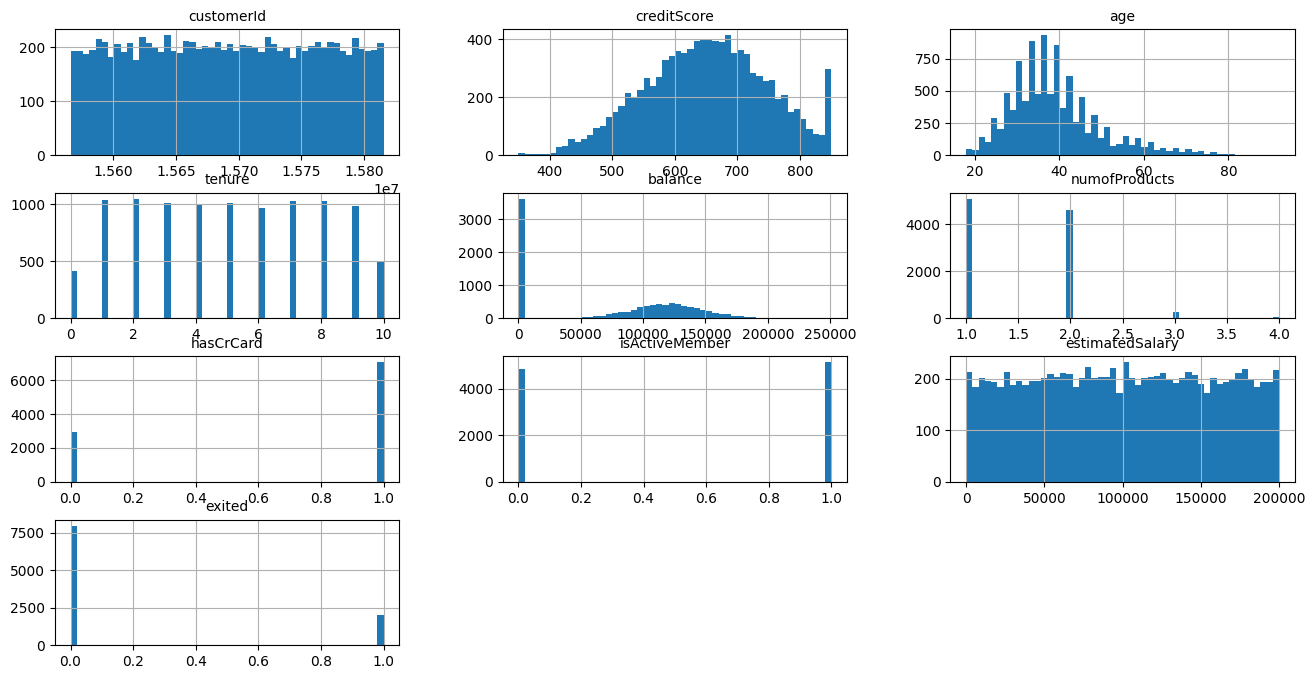

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', size=10)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

customer.hist(bins=50, figsize=(16, 8))
plt.show()

In [7]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.0 MB/s eta 0:00:00


In [8]:
import numpy as np
from ydata_profiling import ProfileReport

profile = ProfileReport(customer, title="Customer Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

### Observation
*   It shows a significant imbalance in the "exited" variable, with approximately
79.6% of customers still active (0) and 20.4% having exited (1).
*   The distribution of customers across geography is not uniform, with France accounting for the largest share (50.1%).
*   "Balance" has a high frequency of zero (36.2%).
*   Age is slightly right-skewed, but not to an extreme degree.
*   Estimated salary has a uniform distribution.
*   Age and number of products have a relatively strong relationship with "exited".
*   There are no missing values across all features.











